# Excercise of PCA

Principal component analysis (PCA) is an algorithm to find the dimensions for which the projected data
have the largest variance. 

## Steps of PCA:

* Find D eigenvalues and eigenvectors of the covariance matrix
* Select the largest M < D eigenvalues and the corresponding eigenvectors to be the new space. 

## My understand:

* To keep important information as possible, we have to maximum the variances of data in other basis.

* The covariance matrix presents variances of data, the norm 2 of the covariance matrix will be maximum when the eigenvalue be maximum in condition the norm 2 of eigenvector equal 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Data

In [2]:
#processing data
x = np.array([
    [2.5,2.4],[0.5, 0.7],[2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1 , 1.1], [1.5, 1.6], [1.1, 0.9]])

m = x.mean(axis = 0)
print("Mean: \n",m)

variance  = x - m
print("Variance: \n",variance)


Mean: 
 [1.81 1.91]
Variance: 
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


## Find  eigvectors and new points

In [3]:
#cov matrix
C = np.dot(variance.T,variance)

#eigvector and eigvalue
lamda,v = np.linalg.eig(C)
print("eigvalue: \n",v)
print("eigvector: \n",lamda)
print("-----------------------------------------------------")
id = np.argmax(lamda)
print("Chosen eigvector index: ", id)

#new points
xx = np.dot(v[:,id],variance.T).reshape(len(x),1)
print("Projected data: \n", xx)
o = np.dot(xx,v[:,id].reshape(len(v),1).T) + m 
#print("Projected data: \n", xx)
#print(o)

eigvalue: 
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
eigvector: 
 [ 0.44175059 11.55624941]
-----------------------------------------------------
Chosen eigvector index:  1
Projected data: 
 [[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


## Plot

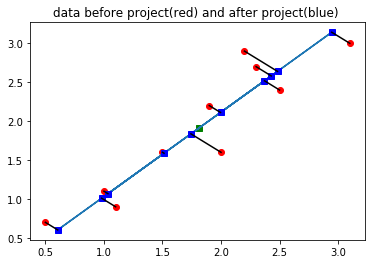

In [4]:
#plot 
plt.plot(x[:,0], x[:,1], 'ro')
plt.plot(m[0],m[1],'gs')
plt.plot(o[:,0],o[:,1])
plt.plot(o[:,0],o[:,1],'bs')

for i in range(len(xx)):
    plt.plot(np.array([x[i,0],o[i,0]] ) ,np.array([x[i,1],o[i,1]] ),'k-')

plt.title("data before project(red) and after project(blue) ")
plt.show()
